<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/section-KP/section4-KP-exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-202M ABC SECTION #4
###### TF: Kelsey Pukelis

**I - INSTRUCTIONS**  

1. **Create a copy of this Jupyter notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!***
    1. Remember to save your work frequently by pressing `command-S` or clicking `File > Save` in the menubar.
    1. We recommend completing this in Google Chrome.

## Part I: Data exercise for non-linear relationships

For this problem, we will be looking at data you may have seen before on income mobility in the U.S. (Same data as section 1!)

For more information, see the paper ["The Opportunity Atlas: Mapping the Childhood Roots of Social Mobility"](https://opportunityinsights.org/paper/the-opportunity-atlas/) by Raj Chetty, Nathaniel Hendren, John Friedman, Maggie R. Jones, and Sonya R. Porter. (Looking at this resource is not necessary for completing the problem, but you may find it interesting or helpful for articulating interpretations.)

## Load `R` libraries and data

**Please refer to Sheet 1 in this [R Cheat Sheet](https://bit.ly/HKS-R) which includes the commands you learned last semester in addition to a number of additional ones.**

The code cell below imports the R tidyverse and creates a dataframe that we will be using for the next exercise. Make sure to run it before starting the problem!

*Note: Click the "play" button that appears when you hover over a cell to run it. The first time you do this you may receive an alert that this notebook was not authored by Google. If so, click "Run anyway" to proceed.*

In [ ]:
#suppress warnings
options(warn = -1,dplyr.summarise.inform=FALSE)

#load packages
library(tidyverse)
library(broom)
library(ggplot2)

# load data
mobility_all <- read.csv('https://opportunityinsights.org/wp-content/uploads/2018/10/national_percentile_outcomes.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# run this to select only the variables in the data we will be working with
mobility <- mobility_all %>% 
  select(par_pctile,(starts_with("jail") & ends_with("_pooled")))

Here is a description of each variable in our shortened dataset:

*   ``par_pctile``: Parent Income Rank in National Income Distribution. 
*   ``jail_pooled_pooled``: Fraction incarcerated on April 1st, 2010 (where incarceration is defined as residing in a federal detention center, federal prison, state prison, local jail, residential correctional facility, military jail, or juvenile correctional facility). The first "pooled" label means the data represents all races. The second "pooled" label means because the data represents all genders.
*   ``jail_[race]_pooled``: Fraction incarcerated on April 1st, 2010 for that race/ethnicity group. (Like above, the last "pooled" means these data represents all genders.)

(Here is the  [codebook](https://opportunityinsights.org/wp-content/uploads/2019/07/Codebook-for-Table-7.pdf) for the full data, if you're curious.)

In [ ]:
# take a look at the first few observations of the data
head(mobility)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.05587,0.004098,0.10430,0.03499,0.07073,0.02007,0.03733
2,2,0.05033,0.003936,0.09618,0.03290,0.05996,0.01597,0.03464
3,3,0.04627,0.004104,0.08644,0.02931,0.06418,0.01906,0.03460
4,4,0.04445,0.004954,0.08586,0.02776,0.05662,0.01667,0.03246
5,5,0.04172,0.004271,0.08046,0.02634,0.04995,0.01573,0.03146
6,6,0.04048,0.003178,0.08032,0.02490,0.05258,0.01598,0.02974



**Let's start out with familiarizing ourselves with the interpretation of the variable for Parent Income Rank** (``par_pctile``).

A. A rank of 1 mean means that a parent was **very poor**. In particular, they were in the lowest percentile of the national income distribution.

B. A rank of 99 mean means that a parent was **very rich**. In particular, they were in the highest percentile of the national income distribution.

C. A rank of 50 mean means that a parent was **in the middle** of the national income distribution. In particular, they were at the median.

**Convert the ``jail_`` variables from fractions to percents, to ease interpretations.**

In [ ]:
mobility_pct <- mobility %>% 
  mutate(jail_pooled_pooled = jail_pooled_pooled*100) %>% 
  mutate(jail_asian_pooled = jail_asian_pooled*100) %>% 
  mutate(jail_black_pooled = jail_black_pooled*100) %>% 
  mutate(jail_hisp_pooled = jail_hisp_pooled*100) %>% 
  mutate(jail_natam_pooled = jail_natam_pooled*100) %>% 
  mutate(jail_other_pooled = jail_other_pooled*100) %>% 
  mutate(jail_white_pooled = jail_white_pooled*100)
head(mobility_pct)

,par_pctile,jail_pooled_pooled,jail_asian_pooled,jail_black_pooled,jail_hisp_pooled,jail_natam_pooled,jail_other_pooled,jail_white_pooled
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,5.587,0.4098,10.430,3.499,7.073,2.007,3.733
2,2,5.033,0.3936,9.618,3.290,5.996,1.597,3.464
3,3,4.627,0.4104,8.644,2.931,6.418,1.906,3.460
4,4,4.445,0.4954,8.586,2.776,5.662,1.667,3.246
5,5,4.172,0.4271,8.046,2.634,4.995,1.573,3.146
6,6,4.048,0.3178,8.032,2.490,5.258,1.598,2.974


## All races

**(From section 1) 0a. Create a scatter plot showing the relationship between incarceration rates and parent income rank for the whole sample (all races and genders).**

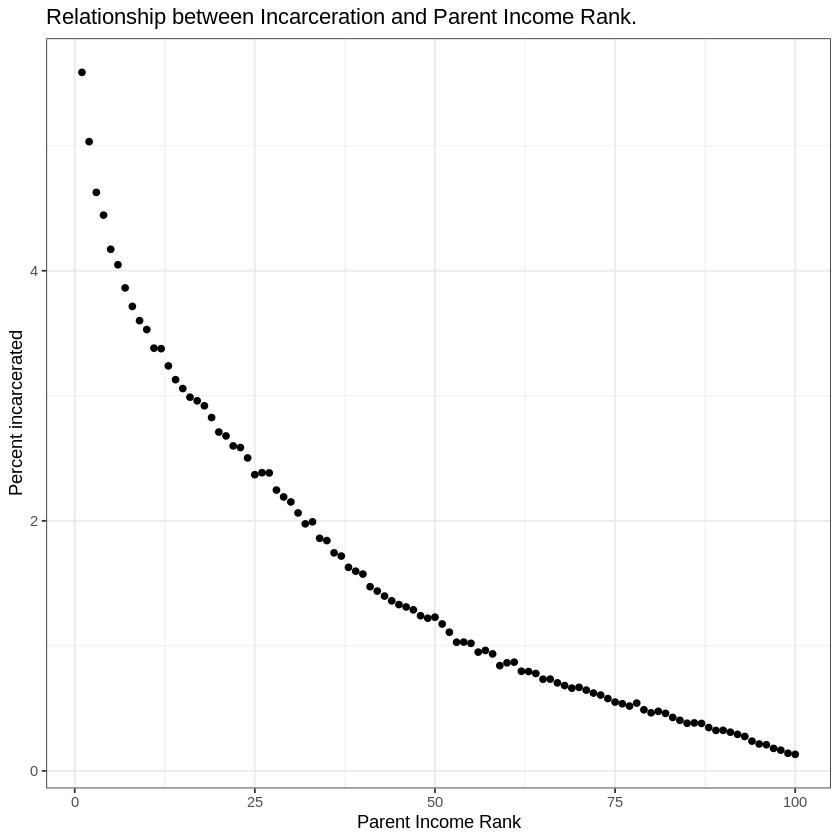

In [ ]:
# Your Answer Here

# START

# scatter plot
# the next two lines of code are essential for creating the bare-bones plot
base_plot <- mobility_pct %>% 
  ggplot(aes(x = par_pctile,y = jail_pooled_pooled)) + geom_point() +
  # the rest of this is just labeling and formatting to make things look nice
  ggtitle("Relationship between Incarceration and Parent Income Rank.") +
  xlab("Parent Income Rank") +
  ylab("Percent incarcerated") +
  theme_bw()
base_plot
# END

**0b. Comment on this "scatter" plot. For example, you might consider whether the relationship appears linear, whether this looks like a "scatter" plot, and on the correlation of these variables. What is your takeaway about the relationship between parental income and incarceration rates?**

#### START

The relationship between these two variables is negative: children from poor families are incarcerated at higher rates as adults compared to children from rich families. The "scatter" plot is quite streamlined and not very "scattered." In fact, the relationship looks very quadratic or logarithmic. 

Aside: The reason for this striking, clear relationship is because the data is very rich (it is a summary of all families who file taxes in the U.S.) AND the relationship between these variables is very strong/robust. 

#### END

**0c. Overlay a linear regression line to your plot. Comment on the fit of this regression line to the data.**


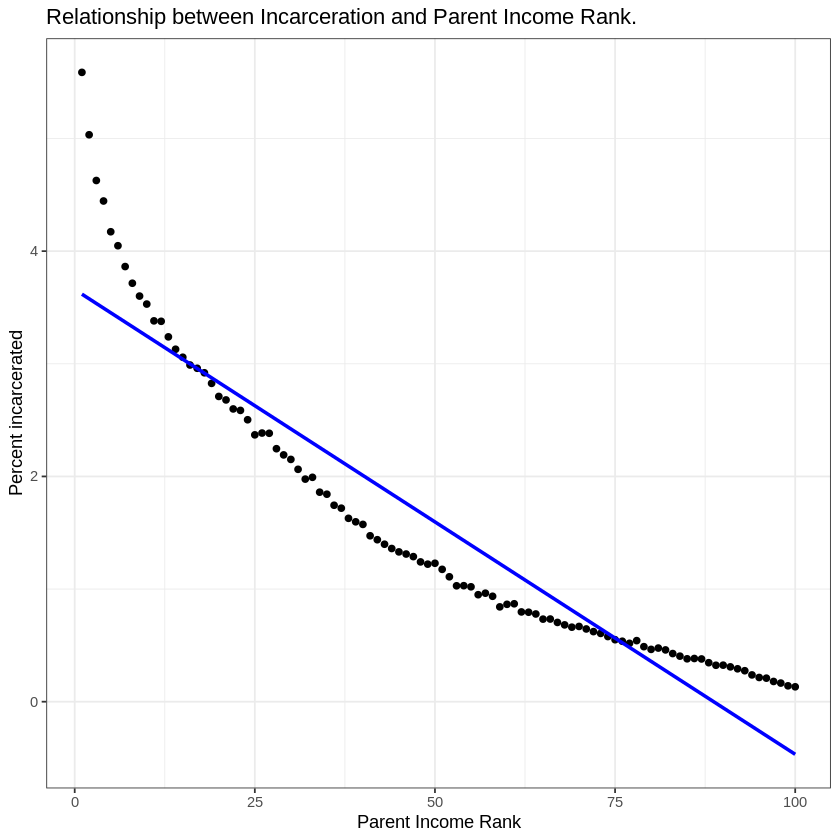

In [ ]:
# Your Answer Here

# START 
base_plot + 
  geom_smooth(method = "lm", se = F, formula = y ~ x,color = "blue") 
# END

#### START

The linear regression line fits the data decently well. It is quite clear that the real relationship is between the variables is non-linear, but the linear model does a decent job at describing the negative relationship between the two variables. 

*Note: You could have said either "well" or "not well", so long as you justify your response. *

One way to tell that the true relationship between the variables is non-linear is that there is a **systematic** change in the sign of the residuals: for low values of X, the residuals are positive; for middle values of X, the residuals are negative, and for high vlues of X, the residuals are positive again. In constrast, if the linear fit was good, the data points would look "randomly" scattered around the regression line, correponding to "random" error. 

#### END

**0d. Run a linear regression of incarceration rate on parental income rank. Interpret the coefficients and comment on their statistical significance.**

In [ ]:
# Your Answer Here

# START 

lm_linear <- lm(jail_pooled_pooled ~ par_pctile,data = mobility_pct)
summary(lm_linear)
# END


Call:
lm(formula = jail_pooled_pooled ~ par_pctile, data = mobility_pct)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4944 -0.3486 -0.1082  0.2401  1.9691 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.659181   0.088678   41.26   <2e-16 ***
par_pctile  -0.041263   0.001525  -27.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4401 on 98 degrees of freedom
Multiple R-squared:  0.882,	Adjusted R-squared:  0.8808 
F-statistic: 732.6 on 1 and 98 DF,  p-value: < 2.2e-16


#### START 

Intercept: The regression estimates that 3.66 percent of children with the very poorest parents end up incarcerated as adults. 

Slope: Increasing the parental income rank by 1 is associated with a 0.04 percentage point decrease in the likelihood that a child ends up incarcerated as an adult. 

Alternatively, increasing the parental income rank by 10 is associated with a 0.4 percentage point decrease in the likelihood that a child ends up incarcerated as an adult.

Both coefficients are highly statistically significant. We can tell this because the p-values for both coefficients are very small (p < 2e-16 = 2 * 10^-16 = 0.0000000000000002). We should have expected this because there is a clear, negative relationship between these two variables as shown in the plot.

#### END

Recall the code for overlaying a linear regression line on a plot:
```
base_plot + geom_smooth(method = "lm", se = F, formula = y ~ x) 
```

To accomodate a nonlinear relationship, we simply indicate a formula. The `I()` wrapper helps tell R how to treat this variable.

```
# quadratic
base_plot + geom_smooth(method = "lm", se = F, formula = y ~ x + I(x^2)) 

# logarithmic
base_plot + geom_smooth(method = "lm", se = F, formula = y ~ I(log(x))) 

```

**1. Plot the scatter plot, now overlaying a quadratic AND logarithmic fit to the line in addition to a linear fit. Comment on which looks like it fits the data better. What does this mean about the relationship between parent income rank and incarceration?** 

In [1]:
# Your code here 

Your Answer Here

**2. Run a regression of the incarceration rate on parent income rank assuming a quadratic relationship. Are the signs of the coefficients what you expected? Connect this to the table in the lecture notes about the signs on quadratic specifications.**

In [2]:
# Your code here 

Your answer here 

**3. Now run a regression of incarceration rate on the log of parental income rank. Interpret the coefficient.**


In [3]:
# Your code here 

Your answer here

**4. Using the logarithmic model, predict the incarceration rate for a person at each of the the following income ranks: 10, 20, 80 and 90. Compare to the actual data points.**

In [4]:
# Your code here (optional)

**Bonus: Create a scatter plot of incarceration rate and *log of* parental income rank. What do you notice?**

In [5]:
# Your code here 

Your answer here

**Bonus. Create a table summarizing the three regressions you ran in this section.**

In [ ]:
check_installed <- require(modelsummary)
if(check_installed==F){
  install.packages("modelsummary")
  require(modelsummary)
}


Loading required package: modelsummary

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘webshot’, ‘bayestestR’, ‘datawizard’, ‘checkmate’, ‘insight’, ‘kableExtra’, ‘parameters’, ‘performance’, ‘tables’


Loading required package: modelsummary



In [6]:
# Your code here